In [1]:
# Always run this code.
%config InteractiveShell.ast_node_interactivity="none"
import sys
if 'google.colab' in sys.modules:
  !pip install --force-reinstall git+https://github.com/jamcoders/jamcoders-public-2025.git --quiet
from jamcoders.base_utils import *
from jamcoders.week4.labw4d3a import *

import matplotlib.pyplot as plt
import numpy as np
import random

!pip install networkx matplotlib --quiet
!pip install pydot --quiet

  Preparing metadata (setup.py) ... done


# Week 4, Day 3A: Co-Occurrence Graphs

## You're a wizard, Harry!

Just run through these cells. In the function `get_harry_potter_data`, we split *Harry Potter and the Sorcerer's Stone* into sentences for you. Here are the first 10 sentences!

In [2]:
sentences = get_harry_potter_data()

for i in range(10):
  print(i, sentences[i])

0 Harry Potter and the Sorcerer's Stone CHAPTER ONE THE BOY WHO LIVED Mr and Mrs Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much
1 They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense
2 Mr Dursley was the director of a firm called Grunnings, which made drills
3 He was a big, beefy man with hardly any neck, although he did have a very large mustache
4 Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors
5 The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere
6 The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it
7 They didn't think they could bear it if anyone found out about the Potters
8 Mr

How many sentences are in the Harry Potter dataset?

In [3]:
print(len(sentences))

5088


Here's a list of Harry Potter characters called `characters`.

In [4]:
characters = [
    'Harry',
    'Ron',
    'Hermione',
    'Mr Dursley',
    'Mrs Dursley',
    'Dumbledore',
    'Hagrid',
    'Snape',
    'McGonagall',
    'Voldemort',
    'Dudley',
    'Draco',
    'Quirrell',
    'Hedwig',
    'Lily',
    'James',
    'Filch',
    'Neville',
    'Crabbe',
    'Goyle',
]

## Co-Occurrence Functions

Create a function called `has_both_unique` that checks if two unique characters, `char1` and `char2`, are in the same `sentence`.

**NOTE**: this should be false if the first character is the same as the second character!


In [5]:
def has_both_unique(sentence, char1, char2):
  """
  Check if two unique character names appear in the sentence.

  Parameters:
      sentence (str): The sentence to search within.
      char1 (str): The first character's name.
      char2 (str): The second character's name.

  Returns:
      bool: True if unique char1 and char2 appear in the sentence, False otherwise.
  """
  return char1 != char2 and char1 in sentence and char2 in sentence

assert_equal(got=has_both_unique('Do Hanna and Lydia look alike?', 'Hanna', 'Lydia'), want=True)
assert_equal(got=has_both_unique('Seriously, do Hanna and Lydia look alike?', 'Lydia', 'Hanna'), want=True)
assert_equal(got=has_both_unique('Xavier will give Joy five eggs.', 'Xavier', 'Sam'), want=False)
assert_equal(got=has_both_unique('Xavier will give Joy five eggs.', 'Xavier', 'Joy'), want=True)
assert_equal(got=has_both_unique('Bruno likes to run', 'Bruno', 'Bruno'), want=False)

Test case passed.
Test case passed.
Test case passed.
Test case passed.
Test case passed.


Write a function called `create_key` that returns a tuple with the `char1` and `char2` in alphabetical order.

Remember, a tuple called `fruit` with `"apple"` and `"banana"` can be initialized like so: `fruit = ("apple", "banana")`.

*Hint: how do string comparisons with `>`, `<`, etc. work?*

In [36]:
print("a" < "b")
print("Ron" < "Harry")

True
False


In [6]:
def create_key(char1, char2):
  """
  Return a tuple containing char1 and char2 in alphabetical order.

  Parameters:
      char1 (str): The first character's name.
      char2 (str): The second character's name.

  Returns:
      tuple: A tuple (char1, char2) where char1 <= char2 alphabetically.

  Notes:
      This ensures consistent key ordering for use in dictionaries,
      such as for co-occurrence counting.
  """
  if char1 < char2:
    return (char1, char2)
  else:
    return (char2, char1)

assert_equal(got=create_key("Harry", "Ron"), want=("Harry", "Ron"))
assert_equal(got=create_key("Ron", "Harry"), want=("Harry", "Ron"))

Test case passed.
Test case passed.


Create a function called `add_cooccurrence` that updates a dictionary called `data` if `char1` and `char2` co-coccur in the `sentence`.

* This function uses `has_both_unique` to determine if two characters co-occur.
* When this happens, use `create_key` to update the dictionary.

**NOTE**: the function should modify `data` directly. It doesn't need to return `data`.

In [7]:
def add_cooccurrence(sentence, char1, char2, data):
    """
    Update the co-occurrence dictionary if both characters appear in the sentence.

    Parameters:
        data (dict): A dictionary where keys are (char1, char2) tuples and values are co-occurrence counts.
        sentence (str): The sentence to check for character mentions.
        char1 (str): The first character's name.
        char2 (str): The second character's name.

    Notes:
        - The order of char1 and char2 in the key is alphabetically sorted.
        - The function increments the count for the pair if both names appear in the sentence.
    """
    if has_both_unique(sentence, char1, char2):
      key = create_key(char1, char2)
      if key in data:
        data[key] += 1
      else:
        data[key] = 1


data = {}

add_cooccurrence('Bruno likes to run.', 'Bruno', 'Bruno', data)
assert_equal(got=data, want={})

add_cooccurrence('Do Hanna and Lydia look alike?', 'Hanna', 'Lydia', data)
assert_equal(got=data, want={('Hanna', 'Lydia'): 1})

add_cooccurrence('Seriously, do Hanna and Lydia look alike?', 'Lydia', 'Hanna', data)
assert_equal(got=data, want={('Hanna', 'Lydia'): 2})

add_cooccurrence('Xavier will give Joy five eggs.', 'Xavier', 'Sam', data)
assert_equal(got=data, want={('Hanna', 'Lydia'): 2})

add_cooccurrence('Xavier will give Joy five eggs.', 'Xavier', 'Joy', data)
assert_equal(got=data, want={('Hanna', 'Lydia'): 2, ('Joy', 'Xavier'): 1})


Test case passed.
Test case passed.
Test case passed.
Test case passed.
Test case passed.


Create a function called `count_cooccurrences` that counts the number of times two characters appear together in a list of sentences, then returns the counts in a dictionary.

When you're done, the dictionary should follow the formatting below:

```
{
  ("Orr", "Zaria"): 2,
  ("Hanna", "Lydia"): 5,
  ("Bruno", "Frank"): 1,
}
```

*Here's some pseudocode:*

* Initialize a dictionary for storing the co-occurrence counts.
* Loop through the sentences.
  * Outer loop through characters.
    * Inner loop through characters. **Do not repeat the same pair!**
      * Call `add_cooccurrence` with the correct inputs.
* Return the dictionary.

*Hint: if you check for Harry and Ron, do you still need to check for Ron and Harry?*


In [8]:
# YOUR CODE HERE

def count_cooccurrence(sentences, characters):
  """
  Computes the number of co-occurrences of characters in a list of sentences.

    Args:
        sentences (list(str)): the list of sentences to search.
        characters (list(str)): the list of characters to search for.

    Returns (dict((str, str): int)): The mapping of character-pairs to the number of times they co-occur.
  """

  cooccurrence_data = {}

  for sentence in sentences:
    for i in range(len(characters)):
      for j in range(i+1, len(characters)):
        add_cooccurrence(sentence, characters[i], characters[j], cooccurrence_data)
  return cooccurrence_data

assert_equal(got=count_cooccurrence([], []), want={})
assert_equal(got=count_cooccurrence(['Bruno likes to run.'], ['Bruno', 'Hanna', 'Lydia']), want={})
assert_equal(got=count_cooccurrence(['Bruno likes to run.', 'Do Hanna and Lydia look alike?', 'Seriously, do Hanna and Lydia look alike?'], ['Bruno', 'Hanna', 'Lydia']), want={('Hanna', 'Lydia'): 2})
assert_equal(got=count_cooccurrence(['A B C D E F G', 'A B B A'], ['A', 'B', 'C', 'X', 'Y', 'Z']), want={('A', 'B'): 2, ('B', 'C'): 1, ('A', 'C'): 1})

Test case passed.
Test case passed.
Test case passed.
Test case passed.


Call the function co-occurences on the Harry Potter sentences and characters.

In [9]:
cooccurrence_data = count_cooccurrence(sentences, characters)

Visualize the co-occurrences!

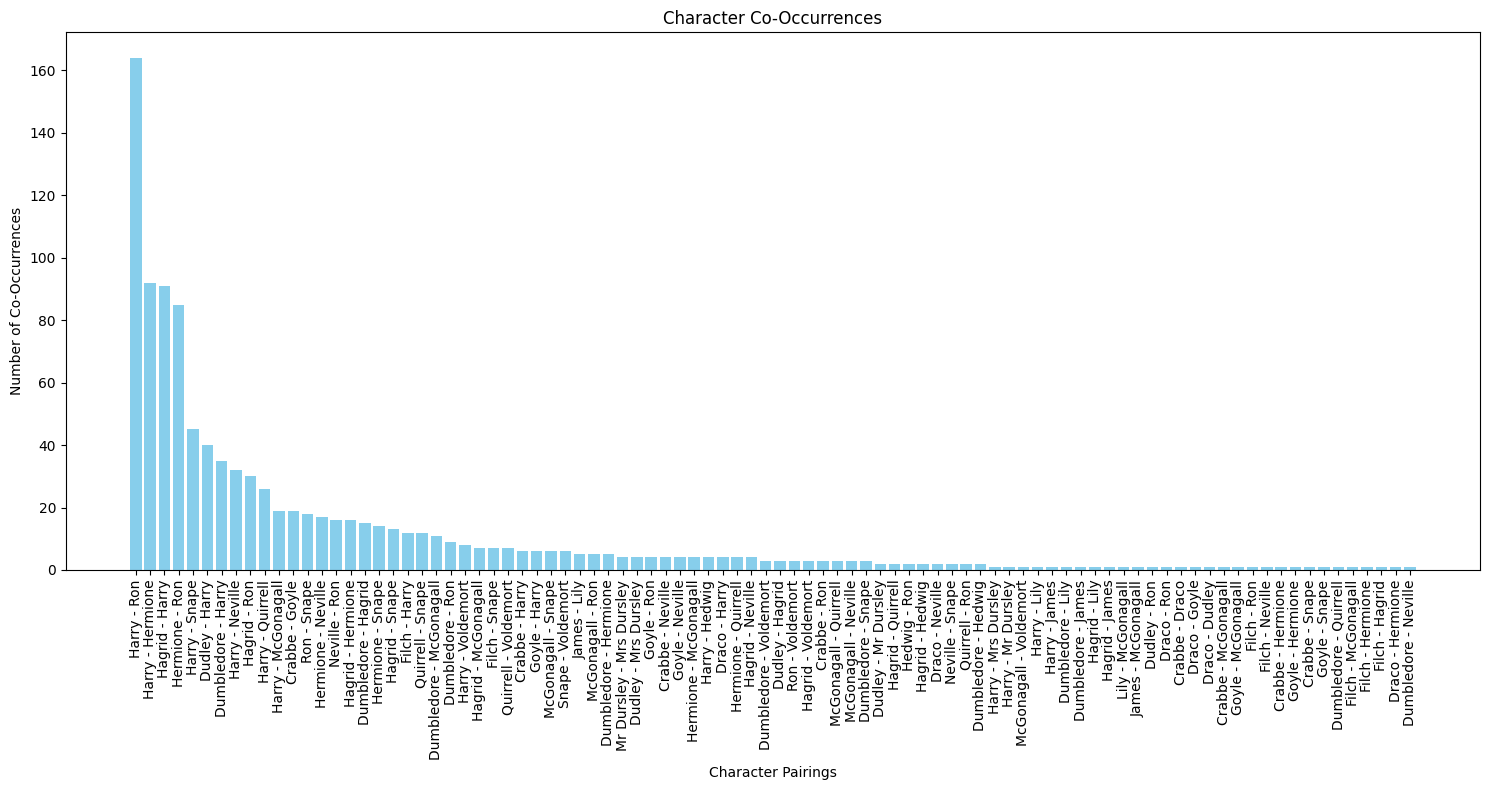

In [10]:
visualize_bar_chart(cooccurrence_data)

Who is Harry's bestie?

In [11]:
# YOUR CODE HERE

## Graphs

Now we can store the information in a graph! How would you store the characters and the co-occurrences?

In [12]:
# DO NOT CHANGE THE CODE BELOW

import networkx as nx
import matplotlib.pyplot as plt

def graph_cooccurrence(data):
  """
  Returns the co-occurrences in graph form.

    Args:
        data (dict((str, str): int)): The mapping of character-pairs to the number of times they co-occur.

    Returns (networkx.Graph): The graph of co-occurrences.
  """

  G = nx.Graph()
  for key in data:
      item1, item2 = key
      weight = data[key]
      G.add_edge(item1, item2, weight=weight)
  return G

G = graph_cooccurrence(cooccurrence_data)


Here's some information about the graph.

In [13]:
print(G.number_of_nodes())

20


In [14]:
print(G.number_of_edges())


90


In [15]:
print(G['Hedwig'])

{'Harry': {'weight': 4}, 'Ron': {'weight': 2}, 'Hagrid': {'weight': 2}, 'Dumbledore': {'weight': 2}}


In [16]:
print(len(G['Harry']))

19


Let's explore plotting our graph. We've written some code for the visualization, but pay attention to this mysterious parameter $k$.

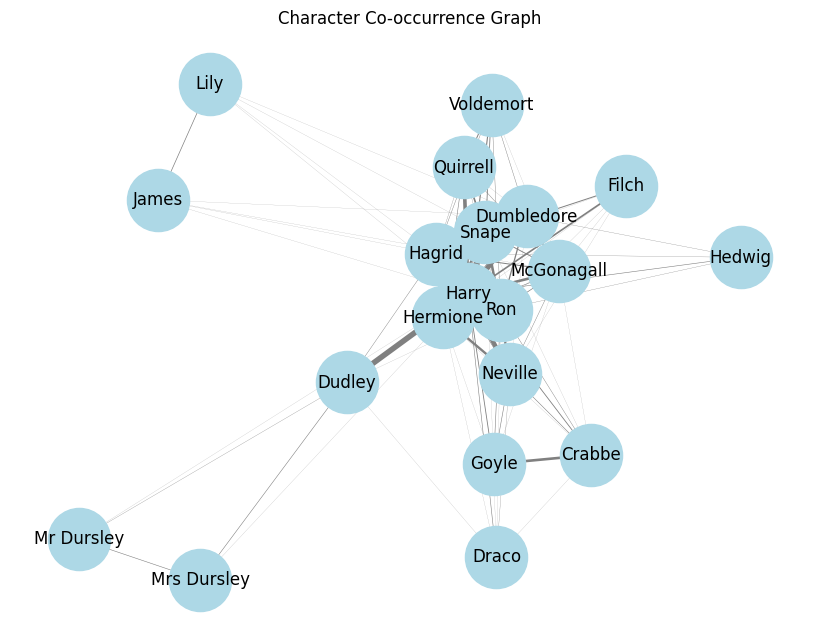

In [17]:
visualize_cooccurence(G, k=1)

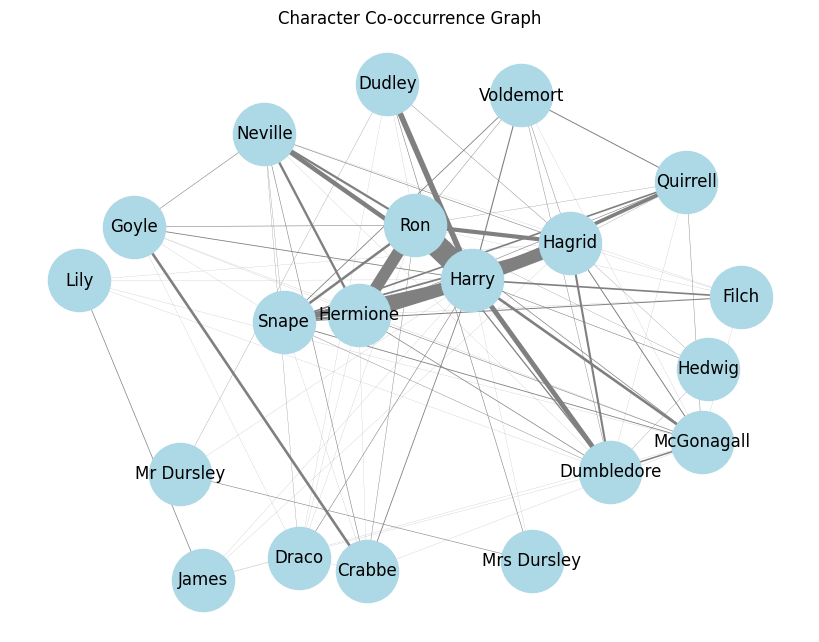

In [18]:
visualize_cooccurence(G, k=5)

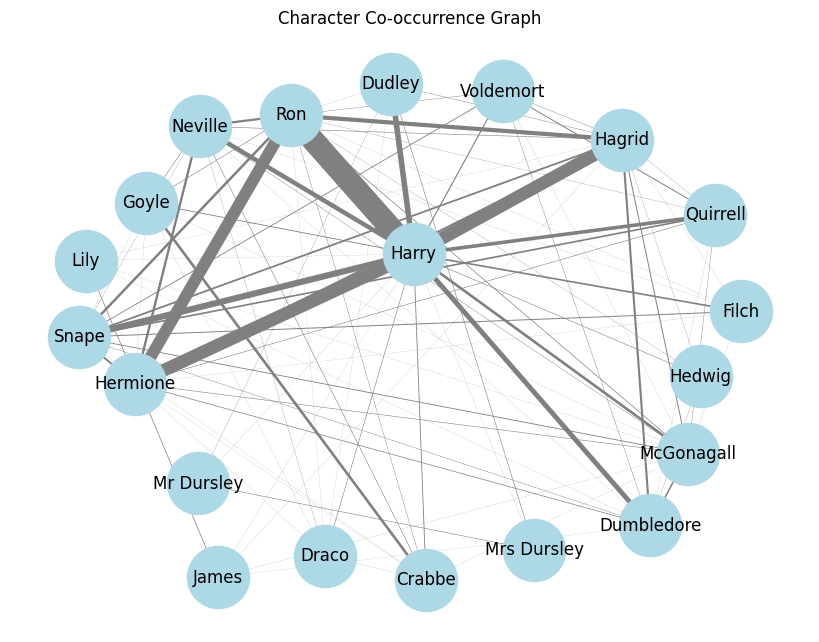

In [19]:
visualize_cooccurence(G, k=9)

What do you observe when $k$ increases? What quality of the graph changes? Just write down your thoughts, and ask a TA if you have any questions!

In [20]:
# YOUR COMMENT HERE

## BFS

In [21]:
# DO NOT CHANGE THE CODE BELOW

def init_q(lst=None):
    """Constructs a new empty queue.

    Arguments: Optional list of initial elements in the queue (Optional[list]).
    Returns (Queue): The new empty queue.
    Effects: None.
    """
    if lst is None:
        return []
    return lst[:]


def enqueue_q(queue, elem):
    """Adds an element to the rear of the queue.

    Arguments:
        queue (Queue): The queue to which the element should be added.
        elem (Any): The element to be added to the queue.
    Returns: None.
    Effects: Modifies `queue` by adding the new element.
    """
    queue.append(elem)


def dequeue_q(queue):
    """Removes the element from the front of the queue and returns it.

    queue must not be empty.

    Arguments:
        queue (Queue): The queue from which the front element should be removed.
    Returns (any): The front element in the queue.
    Effects: The front element is removed from the queue.
    """
    return queue.pop(0)


def peek_q(queue):
    """Returns the element at the front of the queue, without removing it.

    queue must not be empty.

    Arguments:
        queue (Queue): The queue from which the front element should be returned.
    Returns (any): The front element in the queue.
    Effects: None
    """
    return queue[0]


def is_empty_q(queue):
    """Determines whether or not the queue is empty.

    Arguments:
        queue (Queue):  The queue to be checked if it is empty or not
    Returns (bool): True if the queue is empty or False if it is not empty
    Effects: None
    """
    return len(queue) == 0

Previously, we wrote code to check if two nodes are connected in a graph using BFS. Now, we want to see the minimum path length between two characters using `path_length_bfs`.

The code will be slightly different now that the nodes are **not numerical**.

*Here's the psuedocode:*

* Initialize a dictionary for `visited`. (What are the types of the keys and values?)
* Initialize a dictionary for `distances`. (What are the types of the keys and values?)
* If the `start_vertex` or `end_vertex` is not in `G`, return $-1$.
* Initialize `queue` with the `start_vertex` and update `visited`.
* While there are still items in the `queue`:
  * remove the ```current_vertex``` from the `queue`
  * call `get_neighbors` to loop over all `current_vertex`'s neighbors:
    * if the `neighbor` has not yet been visited:
      * add it to the `queue`
      * update `visited`
      * update `distance` to the distance between `start_vertex` and `current_vertex+1`
* Return the distance of the `end_vertex`

Here are some helpful examples of graph utilities you can use for `G`.

In [51]:
# print type of G
print("Type of G:", type(G))
print()

# print all the nodes in G
print("Nodes in G:", G.nodes)
print("Number of nodes in G:", len(G))
print()

# check for nodes in G
print('Is Harry in co-occurrence graph G?', 'Harry' in G)
print('Is Orr in co-occurrence graph G?', 'Orr' in G)
print()

# get the neighbots of a node in G
print("Neighbors of Hedwig in co-occurrence graph G:", G['Hedwig'])

Type of G: <class 'networkx.classes.graph.Graph'>

Nodes in G: ['Harry', 'Mrs Dursley', 'Mr Dursley', 'Dudley', 'Dumbledore', 'McGonagall', 'Voldemort', 'James', 'Lily', 'Hagrid', 'Quirrell', 'Ron', 'Hermione', 'Neville', 'Crabbe', 'Goyle', 'Draco', 'Snape', 'Hedwig', 'Filch']
Number of nodes in G: 20

Is Harry in co-occurrence graph G? True
Is Orr in co-occurrence graph G? False

Neighbors of Hedwig in co-occurrence graph G: {'Harry': {'weight': 4}, 'Ron': {'weight': 2}, 'Hagrid': {'weight': 2}, 'Dumbledore': {'weight': 2}}


In [48]:
def path_length_bfs(G, start_vertex, end_vertex):
    """ returns the length of the path between start_vertex and end_vertex.
    Inputs:
        G: The graph
            type: list[list[int]]
        start_vertex: A node
            type: int
        end_vertex: Another node
            type: int
    Returns:
            type: int
    """
    visited = {}
    distance = {}
    for v in G.nodes:
        visited[v] = False
        distance[v] = -1

    if start_vertex not in G or end_vertex not in G:
        return -1

    queue = init_q()

    enqueue_q(queue, start_vertex)
    distance[start_vertex] = 0

    while not is_empty_q(queue):
        u = dequeue_q(queue)

        for v in G[u]:
            if not visited[v]:
                visited[v] = True
                enqueue_q(queue, v)
                distance[v] = distance[u] + 1

    return distance[end_vertex]

In [49]:
assert_equal(got=path_length_bfs(G, 'Harry', 'Ron'), want=1)
assert_equal(got=path_length_bfs(G, 'Hedwig', 'Voldemort'), want=2)
assert_equal(got=path_length_bfs(G, 'Harry', 'Orr'), want=-1)
assert_equal(got=path_length_bfs(G, 'Sam', 'Dumbledore'), want=-1)
assert_equal(got=path_length_bfs(G, 'Sam', 'Orr'), want=-1)

Test case passed.
Test case passed.
Test case passed.
Test case passed.
Test case passed.


Run the code below to see the two characters that are the furthest away from each other!

In [24]:
def get_max_degrees(G, characters):
  max = 0
  chars = None
  for i in range(len(characters)):
    for j in range(i + 1, len(characters)):
      char1 = characters[i]
      char2 = characters[j]
      if char1 != char2:
        d = path_length_bfs(G, char1, char2)
        if d > max:
          chars = (char1, char2)
          max = d
  return max, chars

max, chars = get_max_degrees(G, characters)
print(max, chars)

2 ('Ron', 'Mr Dursley')


## Congratulations on completing this lab! Here's some extra exploration :)

## Side Characters

Harry, Ron, and Hermione got eaten by a hippogriff 💔 Only the characters below are left.

In [25]:
side_characters = [
    'Dumbledore',
    'Hagrid',
    'Snape',
    'Mr Dursley',
    'Mrs Dursley',
    'McGonagall',
    'Voldemort',
    'Dudley',
    'Draco',
    'Quirrell',
    'Hedwig',
    'Lily',
    'James',
    'Filch',
    'Neville',
    'Crabbe',
    'Goyle',
]

Here are the functions you have access to:


```python
def count_cooccurrence(sentences, characters):
  """
  Computes the number of co-occurrences of characters in a list of sentences.

    Args:
        sentences (list(str)): the list of sentences to search.
        characters (list(str)): the list of characters to search for.

    Returns (dict((str, str): int)): The mapping of character-pairs to the number of times they co-occur.
  """

def graph_cooccurrence(data):
  """
  Returns the co-occurrences in graph form.

    Args:
        data (dict((str, str): int)): The mapping of character-pairs to the number of times they co-occur.
    
    Returns (networkx.Graph): The graph of co-occurrences.
  """

def visualize_cooccurrence(graph, k):
  """
  Visualize the graph.

      Args:
          graph (networkx.Graph): The graph of co-occurrences.
          k (int): mystery parameter!
  """
```

With these functions, try visualizing the graph of side characters!

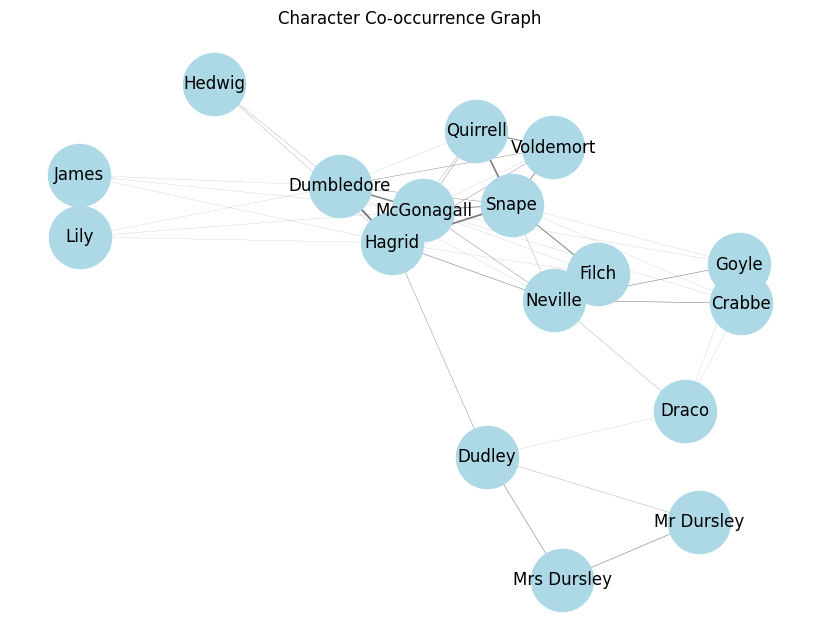

In [43]:
sides_cooccurrences = count_cooccurrence(sentences, side_characters)
G_sides = graph_cooccurrence(sides_cooccurrences)
visualize_cooccurence(G_sides, 1)

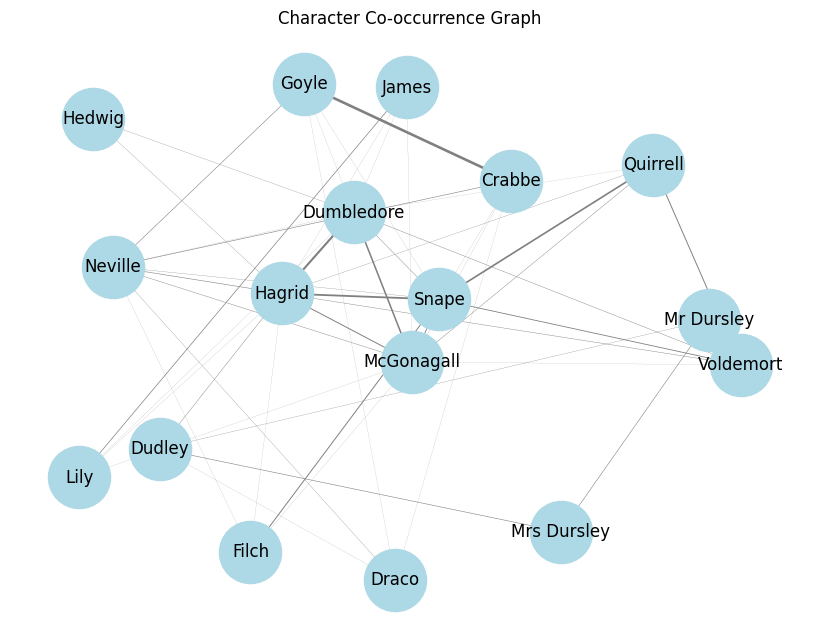

In [27]:
visualize_cooccurence(G_sides, 3)

In [28]:
max, chars = get_max_degrees(G_sides, side_characters)
print(max, chars)

3 ('Dumbledore', 'Mr Dursley')


## Let's make it unweighted!



First, we'll visualize the bar chart again.

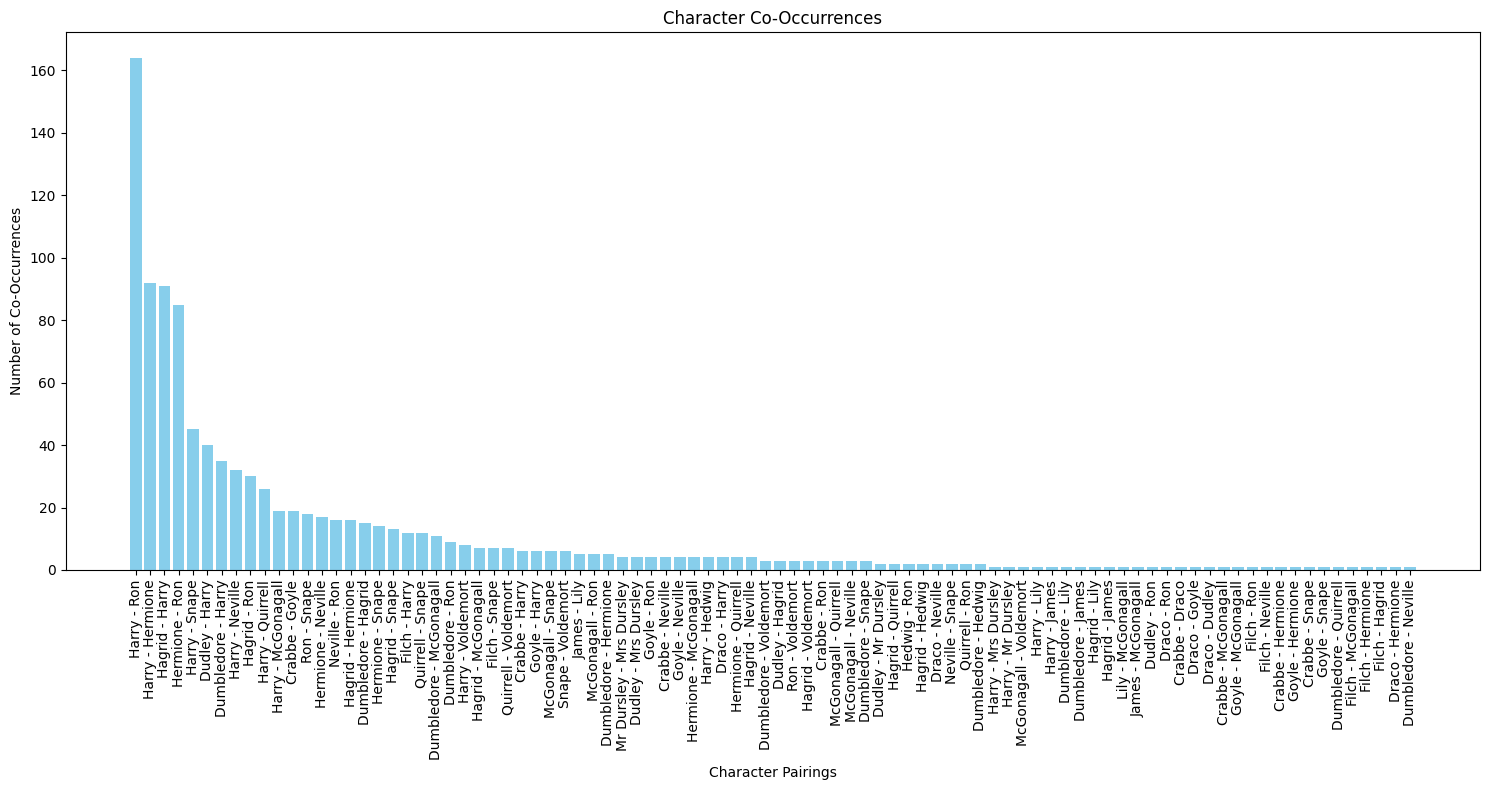

In [29]:
visualize_bar_chart(cooccurrence_data)

There's several different levels of co-occurrence. What if we want only close friends, or people who know each other? Instead of a **weighted** graph, we'd want an **unweighted** graph. We can remove all the edges less than a pre-determined `threshold`.

What would be a good cutoff? Try changing the `threshold` for the number of co-occurrences based on the bar chart above.

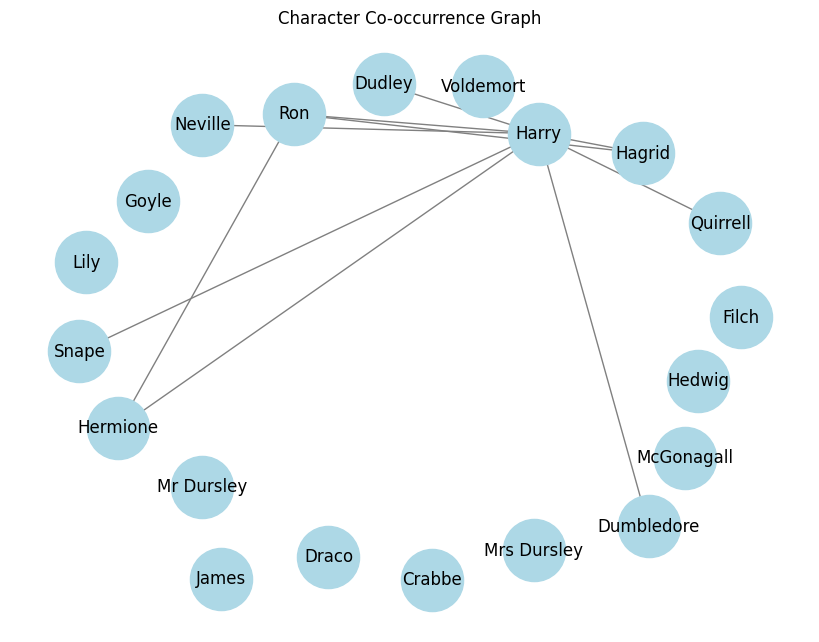

In [33]:
threshold = 20

def prune_data(data, threshold):
  new_dict = {}
  for edge in data:
    if data[edge] > threshold:
      new_dict[edge] = 1
    else:
      new_dict[edge] =  0
  return new_dict

pruned_data = prune_data(cooccurrence_data, threshold)
G_pruned = graph_cooccurrence(pruned_data)
visualize_cooccurence(G_pruned, k=3, weighted=False)

## Congrats on finishing the notebook! You got this 😀